### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.shape

(730, 16)

In [5]:
# 730 rows , 16 columns
# Let us get more information 
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# None of columns have null values, no imputation/cleaning is requried.

In [8]:
#improve readability of the fields
data.rename(columns = {'dteday':'date','temp':'temperature','atemp':'FeelsLike','yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,FeelsLike,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Preparation, as per the problem statement
data['season']=data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
data['month']=data.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data['weathersit']=data.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
data['weekday']=data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,FeelsLike,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data.nunique().sort_values()

year             2
holiday          2
workingday       2
weathersit       3
season           4
weekday          7
month           12
temperature    498
humidity       594
casual         605
windspeed      649
registered     678
FeelsLike      689
count          695
instant        730
date           730
dtype: int64

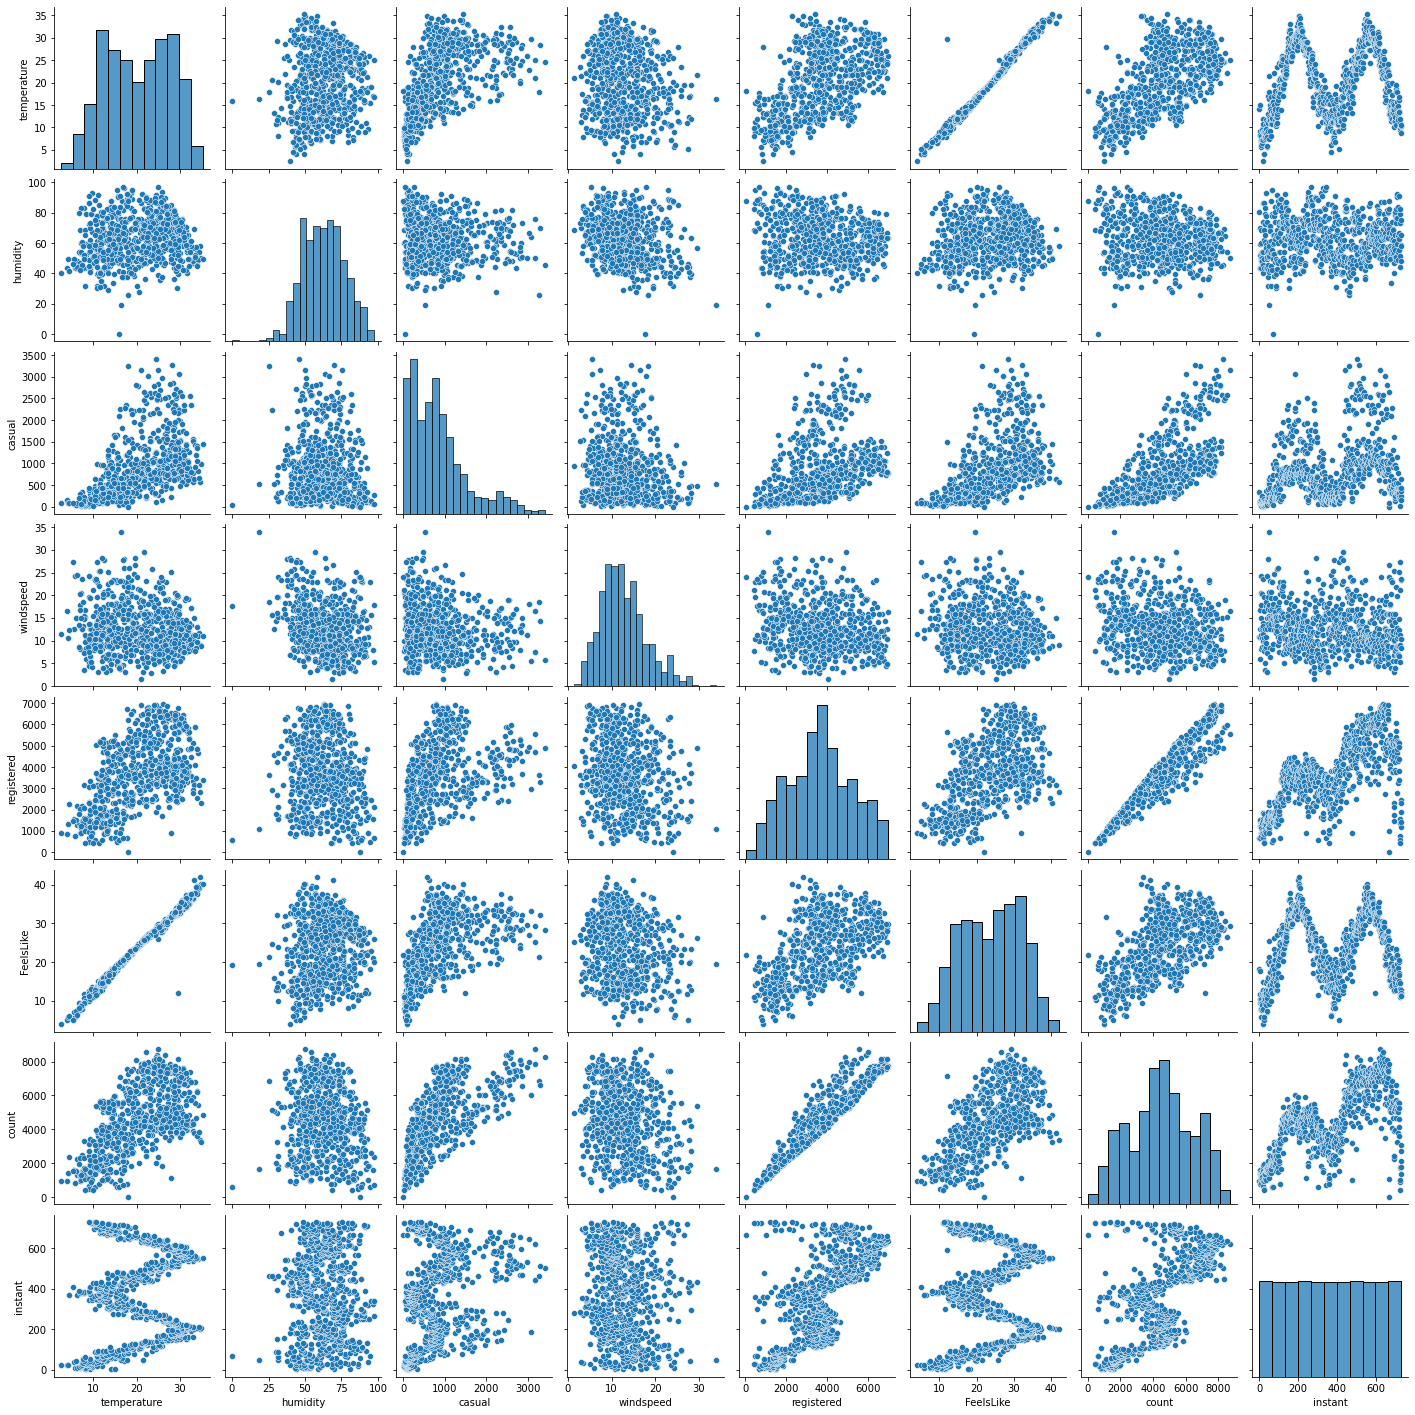

In [12]:
sns.pairplot(data, vars=["temperature", "humidity",'casual','windspeed','registered','FeelsLike','count','instant'])
plt.show()

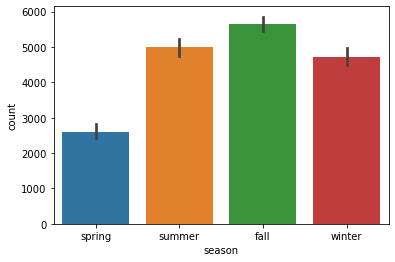

In [13]:
sns.barplot('season','count',data=data)
plt.show()

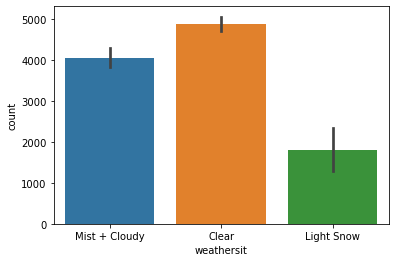

In [14]:
sns.barplot('weathersit','count',data=data)
plt.show()
           

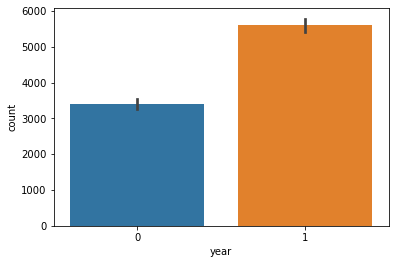

In [15]:
sns.barplot('year','count',data=data)
plt.show()

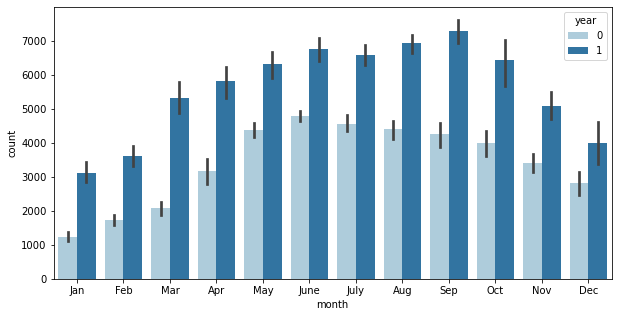

In [16]:
#Relation between month and 
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=data,palette='Paired')
plt.show()

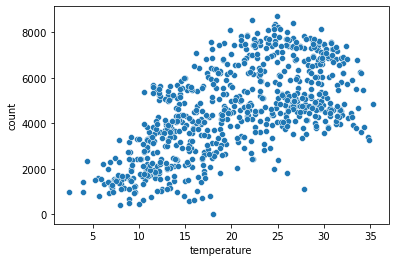

In [17]:
#scatter plot for temperature to count
sns.scatterplot(x='temperature',y='count' ,data=data)
plt.show()

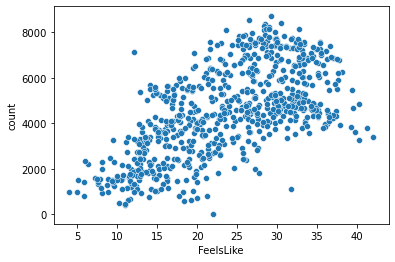

In [18]:
sns.scatterplot(x='FeelsLike',y='count' ,data=data)
plt.show()

### Interesting comparison (between Temperature, Feels Like, we will compare them later)

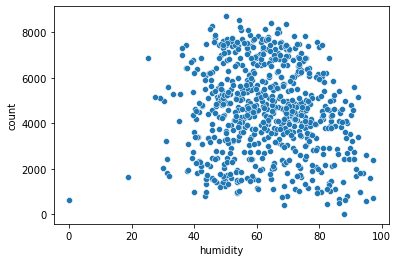

In [19]:
sns.scatterplot(x='humidity',y='count' ,data=data)
plt.show()

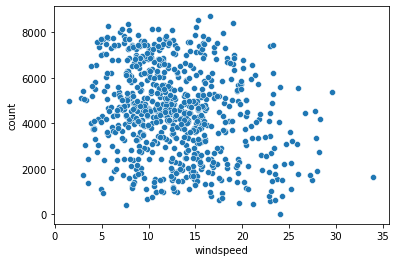

In [20]:
sns.scatterplot(x='windspeed',y='count' ,data=data)
plt.show()

In [21]:
#drop unnecessary columns
data=data.drop(['instant','date','casual', 'registered','temperature'], axis=1)
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,FeelsLike,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


In [22]:
months=pd.get_dummies(data.month,drop_first=True)
weekdays=pd.get_dummies(data.weekday,drop_first=True)
weather_sit=pd.get_dummies(data.weathersit,drop_first=True)
seasons=pd.get_dummies(data.season,drop_first=True)

In [23]:
data.describe()

,year,holiday,workingday,FeelsLike,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,34.000021,8714.000000


In [24]:
data=pd.concat([months,weekdays,weather_sit,seasons,data],axis=1)
data.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,year,month,holiday,weekday,workingday,weathersit,FeelsLike,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


In [25]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
data.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
data.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,FeelsLike,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,11.46350,43.6957,12.522300,1600


In [26]:
#Number of rows and columns
data.shape

(730, 29)

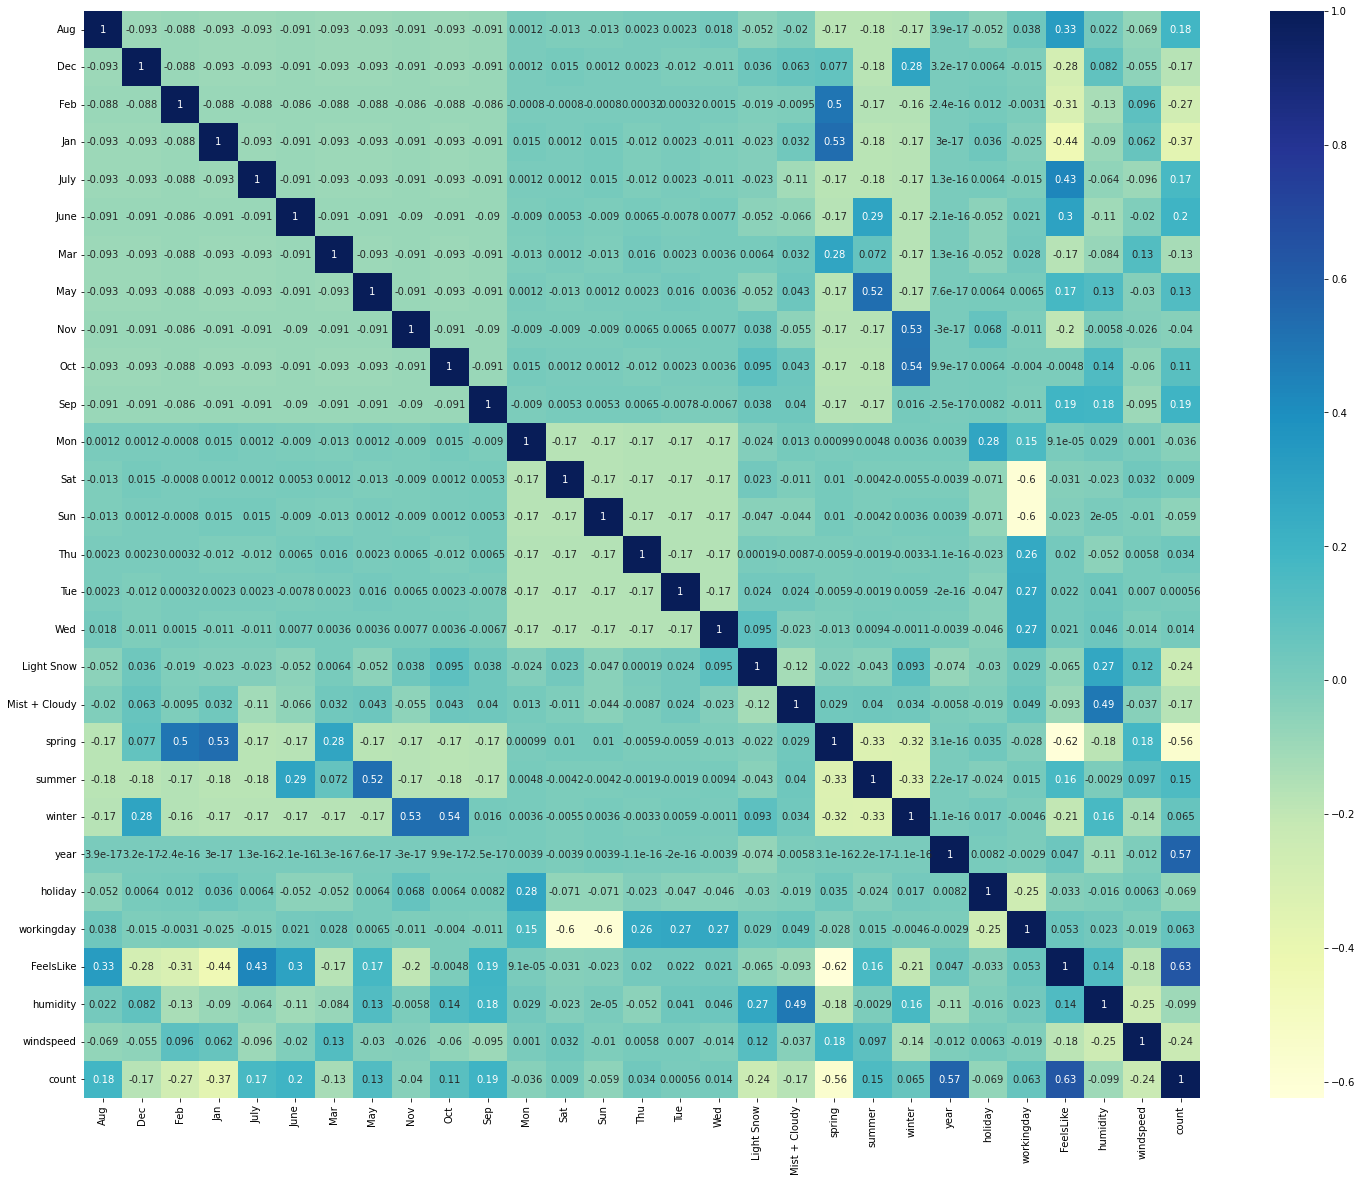

In [27]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [28]:
data['year'] = data['year'].astype(int)
data.dtypes

Aug                uint8
Dec                uint8
Feb                uint8
Jan                uint8
July               uint8
June               uint8
Mar                uint8
May                uint8
Nov                uint8
Oct                uint8
Sep                uint8
Mon                uint8
Sat                uint8
Sun                uint8
Thu                uint8
Tue                uint8
Wed                uint8
Light Snow         uint8
Mist + Cloudy      uint8
spring             uint8
summer             uint8
winter             uint8
year               int32
holiday            int64
workingday         int64
FeelsLike        float64
humidity         float64
windspeed        float64
count              int64
dtype: object

In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, random_state = 100)
print(data_train.shape)
print(data_test.shape)

(510, 29)
(220, 29)


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['FeelsLike','humidity','windspeed','count']

#Fit on data
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])
data_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,FeelsLike,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.391735,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.318819,0.751824,0.380981,0.191095


In [31]:
#Checking numeric variables(min and max) after scaling
data_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,FeelsLike,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['FeelsLike','humidity','windspeed','count']

#Fit on data
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])
data_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,FeelsLike,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.391735,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.318819,0.751824,0.380981,0.191095


In [33]:
data_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,FeelsLike,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


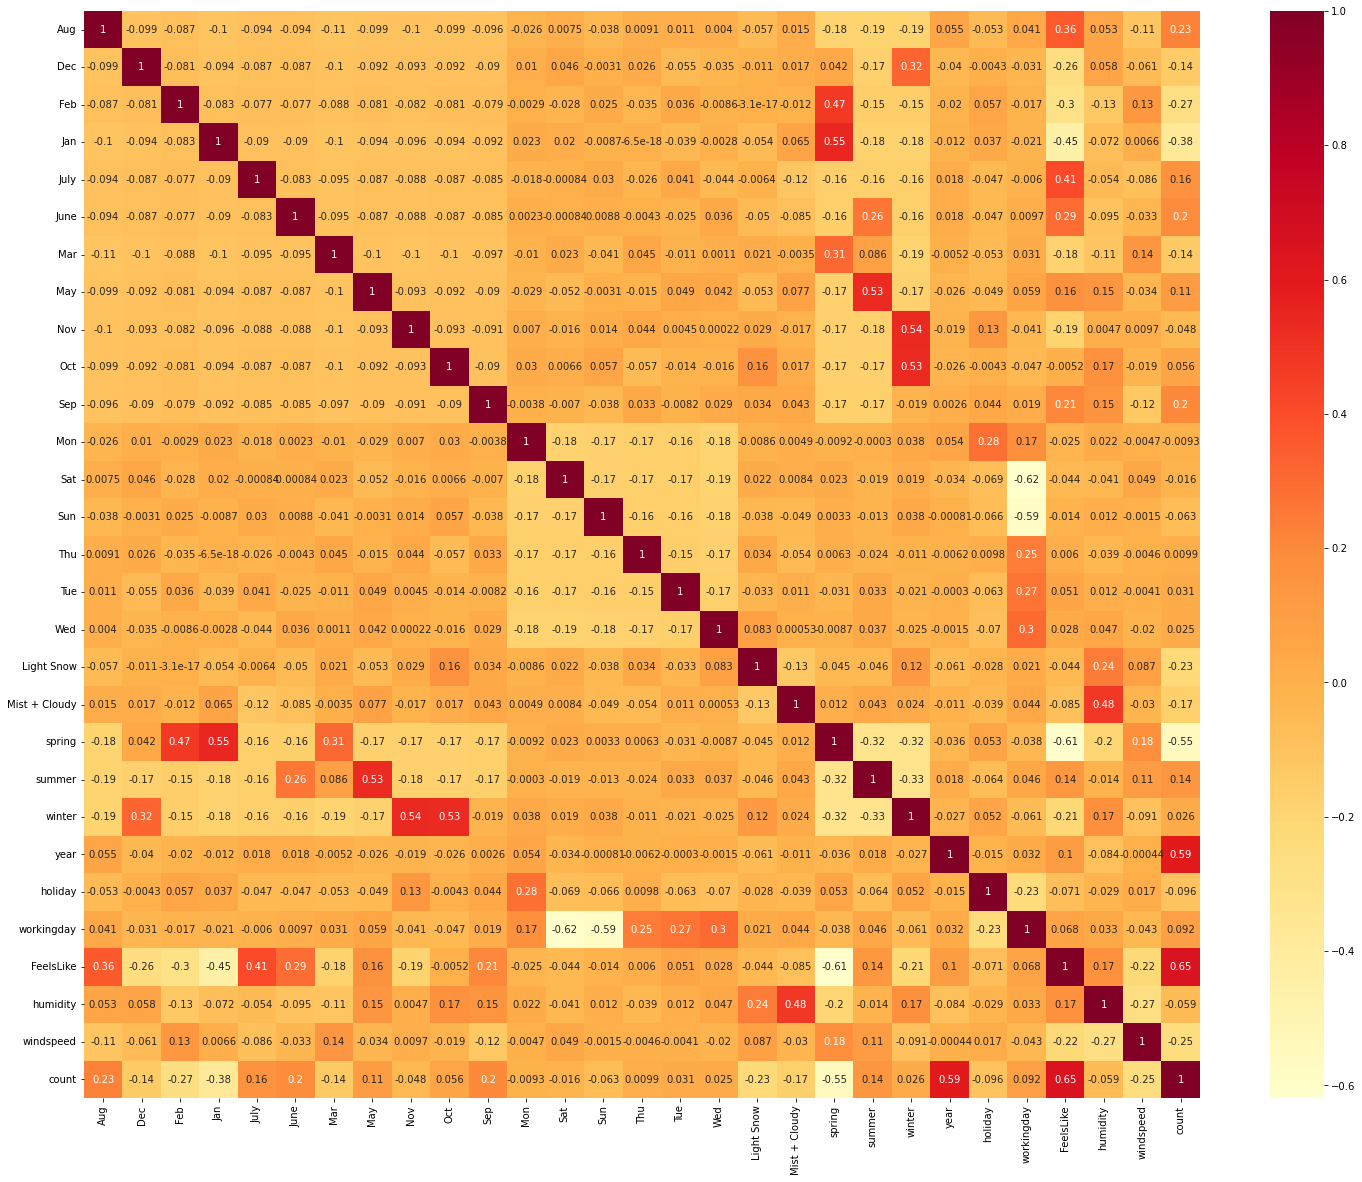

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(data_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

#### From the heatmap we can see temp, year are correlated to the 'count' variable. Even in August, September months we can see the counts are little high.

In [35]:
#Divide the data into X and y
y_train = data_train.pop('count')
X_train = data_train

In [36]:
data.dtypes

Aug                uint8
Dec                uint8
Feb                uint8
Jan                uint8
July               uint8
June               uint8
Mar                uint8
May                uint8
Nov                uint8
Oct                uint8
Sep                uint8
Mon                uint8
Sat                uint8
Sun                uint8
Thu                uint8
Tue                uint8
Wed                uint8
Light Snow         uint8
Mist + Cloudy      uint8
spring             uint8
summer             uint8
winter             uint8
year               int32
holiday            int64
workingday         int64
FeelsLike        float64
humidity         float64
windspeed        float64
count              int64
dtype: object

In [37]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', True, 1),
 ('Dec', False, 2),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 8),
 ('June', False, 7),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 6),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('FeelsLike', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [40]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Aug', 'Feb', 'Jan', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy',
       'summer', 'winter', 'year', 'holiday', 'workingday', 'FeelsLike',
       'humidity', 'windspeed'],
      dtype='object')

In [41]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Dec', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun', 'Thu',
       'Tue', 'Wed', 'spring'],
      dtype='object')

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [45]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.5
Date:                Tue, 29 Mar 2022   Prob (F-statistic):          8.05e-188
Time:                        22:17:04   Log-Likelihood:                 511.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     494   BIC:                            -923.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2208      0.032      6.910

In [46]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,22.78
12,FeelsLike,13.21
11,workingday,5.15
14,windspeed,4.02
8,winter,2.41
7,summer,2.21
6,Mist + Cloudy,2.19
9,year,2.06
4,Sat,1.93
2,Jan,1.81


#### Febrauryis insignificant in presence of other variables due to high p-value and low VIF; can be dropped

In [48]:
#Drop Febraury
X_train_new1 = X_train_rfe.drop(["Feb"], axis = 1)

In [49]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 29 Mar 2022   Prob (F-statistic):          1.52e-188
Time:                        22:17:05   Log-Likelihood:                 510.80
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     495   BIC:                            -928.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2064      0.030      6.818

In [50]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [51]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,20.07
11,FeelsLike,11.71
10,workingday,5.09
13,windspeed,3.83
5,Mist + Cloudy,2.16
8,year,2.04
7,winter,2.03
6,summer,1.97
3,Sat,1.92
1,Jan,1.57


In [52]:
#Drop humidity as the VIF is very high
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

In [53]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 29 Mar 2022   Prob (F-statistic):          1.06e-185
Time:                        22:17:05   Log-Likelihood:                 501.27
No. Observations:                 510   AIC:                            -974.5
Df Residuals:                     496   BIC:                            -915.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1142      0.022      5.198

In [54]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [55]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,FeelsLike,6.36
10,workingday,4.70
12,windspeed,3.65
8,year,2.04
6,summer,1.93
3,Sat,1.85
7,winter,1.63
5,Mist + Cloudy,1.57
0,Aug,1.56
1,Jan,1.32


#### Holiday variable seems to be insignificant, by looking at p value and low VIF. We can drop it

In [56]:
#Drop the holiday column
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Tue, 29 Mar 2022   Prob (F-statistic):          3.96e-186
Time:                        22:17:05   Log-Likelihood:                 499.50
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     497   BIC:                            -918.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1057      0.022      4.908

In [57]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [58]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,FeelsLike,6.22
9,workingday,4.31
11,windspeed,3.56
8,year,2.04
6,summer,1.93
3,Sat,1.76
7,winter,1.60
5,Mist + Cloudy,1.57
0,Aug,1.56
2,Sep,1.31


#### Windspeed seems to be insignificant,by looking at high VIF and negative correlation with count. Lets drop it

In [59]:
#Drop windspeed
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

In [60]:
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.9
Date:                Tue, 29 Mar 2022   Prob (F-statistic):          1.09e-180
Time:                        22:17:05   Log-Likelihood:                 483.81
No. Observations:                 510   AIC:                            -943.6
Df Residuals:                     498   BIC:                            -892.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0385      0.018      2.086

In [61]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,FeelsLike,5.79
9,workingday,4.00
8,year,2.02
6,summer,1.89
3,Sat,1.65
7,winter,1.59
5,Mist + Cloudy,1.57
0,Aug,1.55
2,Sep,1.30
1,Jan,1.26


#### January column can be dropped due to its p value and low VIF

In [63]:
#Drop Jan
X_train_new5=X_train_lm4.drop(['Jan'], axis=1)

In [64]:
#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.7
Date:                Tue, 29 Mar 2022   Prob (F-statistic):          3.99e-181
Time:                        22:17:05   Log-Likelihood:                 482.01
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0215      0.016      1.334

In [65]:
#Drop the constant
X_train_lm7=X_train_lm5.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,FeelsLike,5.67
8,workingday,3.64
7,year,1.98
5,summer,1.81
2,Sat,1.55
0,Aug,1.53
4,Mist + Cloudy,1.53
6,winter,1.51
1,Sep,1.28
3,Light Snow,1.07


### Step 6: Residual Analysis of the train data

In [66]:
#X_train_lm5=sm.add_constant(X_train_lm5)
#X_train_lm5.columns
X_train_lm5

,const,Aug,Sep,Sat,Light Snow,Mist + Cloudy,summer,winter,year,workingday,FeelsLike
576,1.0,0,0,0,0,0,0,0,1,1,0.766351
426,1.0,0,0,1,0,1,0,0,1,0,0.438975
728,1.0,0,0,0,0,0,0,0,1,0,0.200348
482,1.0,0,0,1,0,1,1,0,1,0,0.391735
111,1.0,0,0,0,0,1,1,0,0,1,0.318819
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0,0,0,0,0,1,1,0.824359
53,1.0,0,0,0,0,0,0,0,0,1,0.218747
350,1.0,0,0,1,0,1,0,1,0,0,0.223544
79,1.0,0,0,0,0,1,1,0,0,1,0.434043


In [67]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

In [68]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

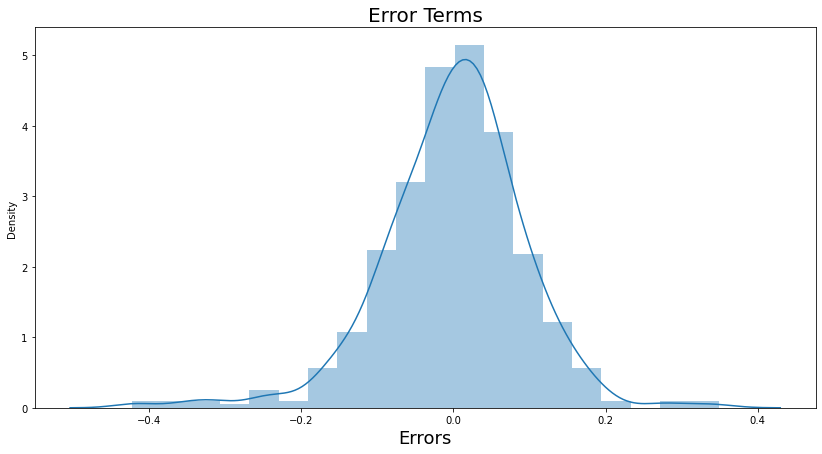

In [69]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

### Error terms are normally distributed

#### Applying the scaling on the test sets

In [70]:
#Create a list of numeric variables
num_vars=['FeelsLike','humidity','windspeed','count']

#Fit on data
data_test[num_vars] = scaler.fit_transform(data_test[num_vars])
data_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,FeelsLike,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.778767,0.534223,0.149393,0.704300
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.855132,0.470417,0.231142,0.725421
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.492359,0.777843,0.443398,0.278853
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.805661,0.236659,0.449707,0.545512
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.749249,0.070765,0.682387,0.569148


In [71]:
#Dividing into X_test and y_test
y_test = data_test.pop('count')
X_test = data_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,FeelsLike,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.530791,0.508362,0.418803
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.227648,0.200875,0.187683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333953,0.361079,0.284201
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.543153,0.491299,0.403318
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.719758,0.650989,0.523975
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
#Columns
X_train_new5.columns

Index(['Aug', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'summer', 'winter',
       'year', 'workingday', 'FeelsLike'],
      dtype='object')

In [73]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Aug,Sep,Sat,Light Snow,Mist + Cloudy,summer,winter,year,workingday,FeelsLike
184,1.0,0,0,0,0,1,0,0,0,0,0.778767
535,1.0,0,0,0,0,0,1,0,1,1,0.855132
299,1.0,0,0,0,0,1,0,1,0,1,0.492359
221,1.0,1,0,0,0,0,0,0,0,1,0.805661
152,1.0,0,0,0,0,0,1,0,0,1,0.749249


In [74]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

In [75]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7993355907963718

In [76]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.7993355)*(11-1)/(11-1-1)
print(Adj_r2)

0.7770394444444444


Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

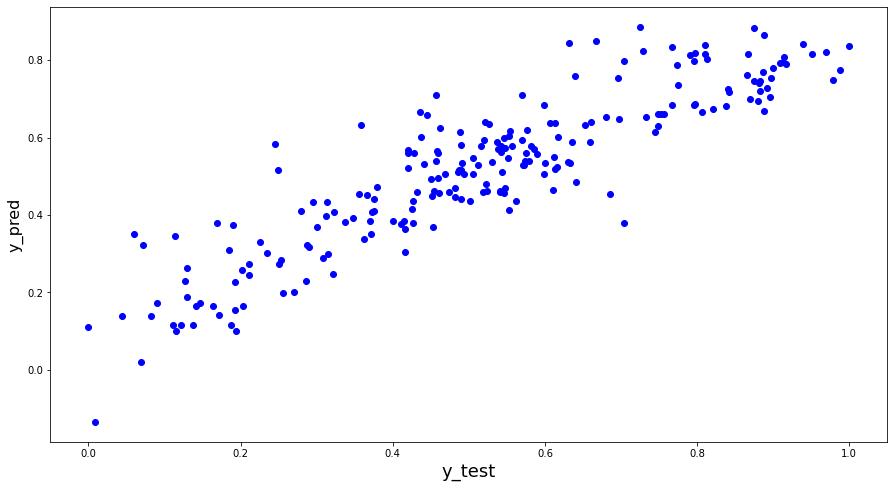

In [77]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

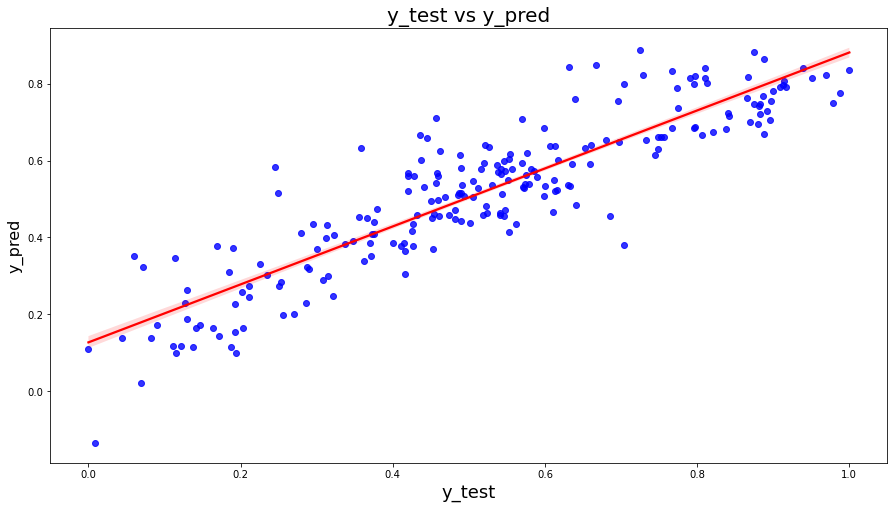

In [78]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Summary
- Temperature plays significant role in bike demand.
- Climate also plays important role Spring season the demand is least and 'Fall' has maximum.
- Whether also has impact in the demand, people prefer to use the rental when the sky is clear.